In [ ]:
pwd

'/content'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/CCA_Task

/content/drive/MyDrive/CCA_Task


In [ ]:
pwd

'/content/drive/MyDrive/CCA_Task'

In [ ]:
# Fitching The data
!kaggle datasets download yeanzc/telco-customer-churn-ibm-dataset
!unzip /content/drive/MyDrive/CCA_Task/telco-customer-churn-ibm-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
License(s): other
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 61.4MB/s]
Archive:  /content/drive/MyDrive/CCA_Task/telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [70]:
# all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [71]:
df = pd.read_excel('/content/drive/MyDrive/CCA_Task/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [72]:
df.tail()
# Target = "Churn Label"

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [74]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
  print(df[col].value_counts())
  print("-"*50+"\n")

CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------------

Country
United States    7043
Name: count, dtype: int64
--------------------------------------------------

State
California    7043
Name: count, dtype: int64
--------------------------------------------------

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64
--------------------------------------------------

Lat Long
33.964131, -118.272783    5
34.152875, -118.486056    5
32.912664, -116.635387    5
32.64164, -116.985026     5
32.607964, -117.059459    5
                      

In [75]:
# Categorical columns

# "Churn Reason" this feature is taken after the customer churn, So it does not exist before the customer churn.
# That means this feature will not be exist to use at the time of prediction,
# So it will not be usefull for training the model and will not represent the reality
# So it shouldn't be exist in the train or test data


"""
drop useless non-meaningful features
 'CustomerID',  // company organization, Just for identification
 'Country',     // one value : United States , no information to add
 'State',       // one value : California , no information to add
 'City',        // too many cities, no need while there are Longitude, Longitude
 'Lat Long',    // no need while there are Longitude, Longitude
 'Churn Reason'
"""


"\ndrop useless non-meaningful features\n 'CustomerID',  // company organization, Just for identification\n 'Country',     // one value : United States , no information to add\n 'State',       // one value : California , no information to add\n 'City',        // too many cities, no need while there are Longitude, Longitude\n 'Lat Long',    // no need while there are Longitude, Longitude\n 'Churn Reason'\n"

In [76]:
# heatures that need encoding:
  # Binary Class:
"""
    ['Gender',
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Paperless Billing']
"""

  # Multiple Class: they have [Yes, No, No "name of service" service] i will consider the last one as No
"""
    ['Phone Service',
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    ]
"""

"""
['Internet Service','Contract','Payment Method'] multible class
"""

"\n['Internet Service','Contract','Payment Method'] multible class\n"

In [77]:
#Numerical columns
"""
drop useless non-meaningful features (numerical cols) :
['Count',       // one value : 1, Just for presentation
 'Zip Code',    // the residence of customer is shown in latitude and longitude, No need to use zip code
]
"""

"\ndrop useless non-meaningful features (numerical cols) :\n['Count',       // one value : 1, Just for presentation\n 'Zip Code',    // the residence of customer is shown in latitude and longitude, No need to use zip code\n]\n"

In [78]:
df.drop(["Count","Zip Code"], axis=1, inplace=True)

In [79]:
# Convert 'Total Charges' to numeric, coercing errors to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Lat Long           7043 non-null   object 
 5   Latitude           7043 non-null   float64
 6   Longitude          7043 non-null   float64
 7   Gender             7043 non-null   object 
 8   Senior Citizen     7043 non-null   object 
 9   Partner            7043 non-null   object 
 10  Dependents         7043 non-null   object 
 11  Tenure Months      7043 non-null   int64  
 12  Phone Service      7043 non-null   object 
 13  Multiple Lines     7043 non-null   object 
 14  Internet Service   7043 non-null   object 
 15  Online Security    7043 non-null   object 
 16  Online Backup      7043 

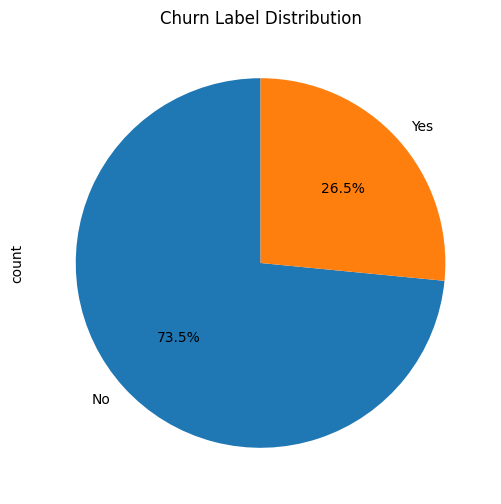

'\n26.5% of customers have stopped using the service,\nThe task is to predict which type of customers are more likely to stop using our\nservice before they churn and how can we win them.\n'

In [80]:
# Plot Churn Label Distribution
plt.figure(figsize=(8, 6))
df['Churn Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Label Distribution')
# plt.ylabel('')
plt.show()

"""
26.5% of customers have stopped using the service,
The task is to predict which type of customers are more likely to stop using our
service before they churn and how can we win them.
"""

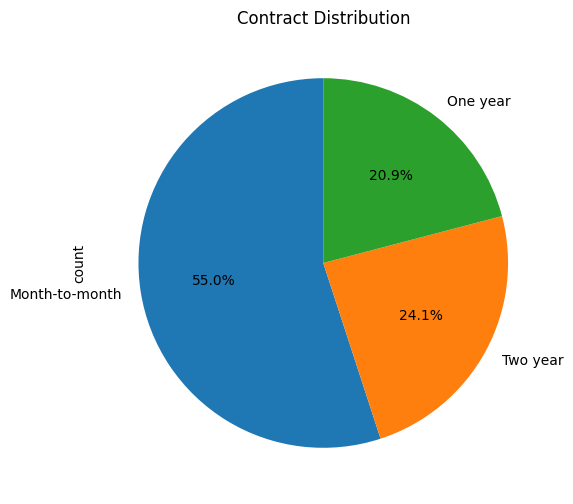

'\n55% of the customer has the "Month-to-month" contract.\nThis could be an indication that the customer is more likely to leave the service,\nas he renews his subscription every month and it is easy for him to leave it next month if,\nfor example, he finds a better offer from another company.\n\n\nQ: How can we motivate the customer to subscribe to a two-year or one-year contract?\n- better services..?\n- better offers..?\n- better customer support..?\n- or something else..?\n\n\n** maybe we can answer this question by explore "Churn Reason" feature\n'

In [81]:
# Contract Distribution
plt.figure(figsize=(8, 6))
df['Contract'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Contract Distribution')
plt.show()

"""
55% of the customer has the "Month-to-month" contract.
This could be an indication that the customer is more likely to leave the service,
as he renews his subscription every month and it is easy for him to leave it next month if,
for example, he finds a better offer from another company.


Q: How can we motivate the customer to subscribe to a two-year or one-year contract?
- better services..?
- better offers..?
- better customer support..?
- or something else..?


** maybe we can answer this question by explore "Churn Reason" feature
"""

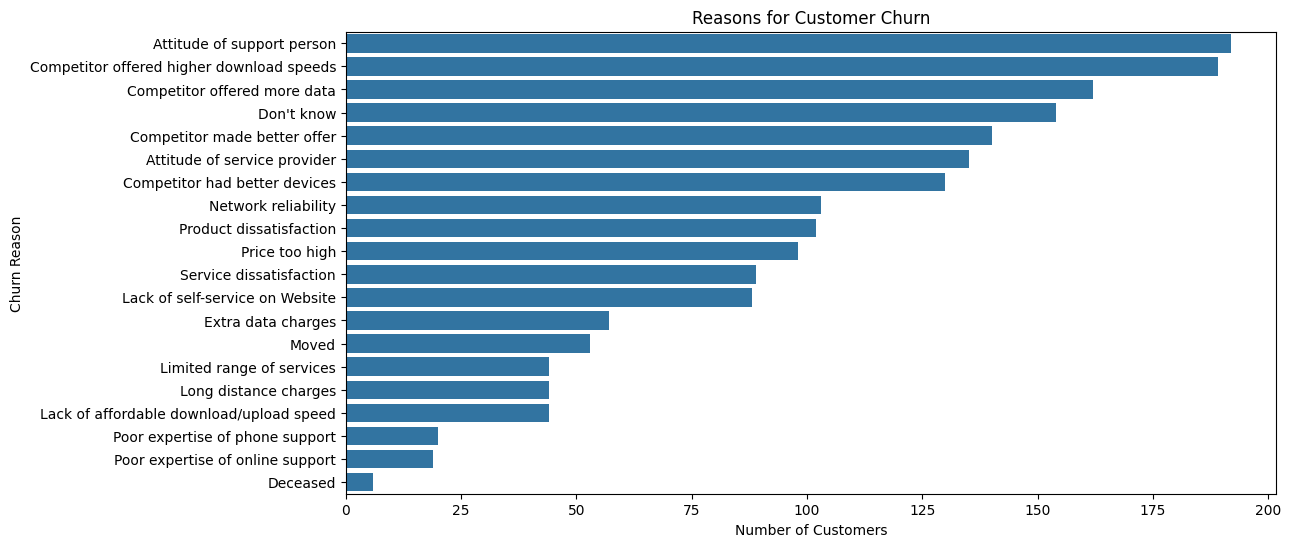

"\nOk, that's great.\nWhile the top 7 of churn reason is about either the support quality or the offers,\nWe can start thinking to improve the customer support and provide better offers.\n"

In [82]:

churn_reasons = df[df['Churn Label'] == 'Yes']['Churn Reason'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(y='Churn Reason', data=df[df['Churn Label'] == 'Yes'], order=churn_reasons.index)
plt.title('Reasons for Customer Churn')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.show()

"""
Ok, that's great.
While the top 7 of churn reason is about either the support quality or the offers,
We can start thinking to improve the customer support and provide better offers.
"""

In [83]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=5, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# The destribution of customers is all over Calefornia,
# There are two areas where customers are significantly concentrated هn the middle and southe of CA.
# It may be an indication, but we need to explore the CA's citizens (it could be the natural distribution of people in the state) to determine if this is a useful insight.

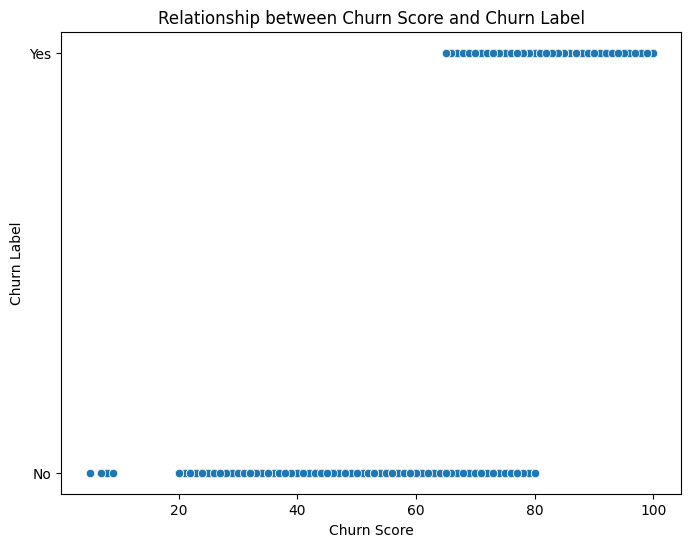

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Churn Score', y='Churn Label', data=df)
plt.title('Relationship between Churn Score and Churn Label')
plt.xlabel('Churn Score')
plt.ylabel('Churn Label')
plt.show()

# Ok that's interesting, the scores from the IBM SPSS are not accurate that much
# So it could be affect the negatively

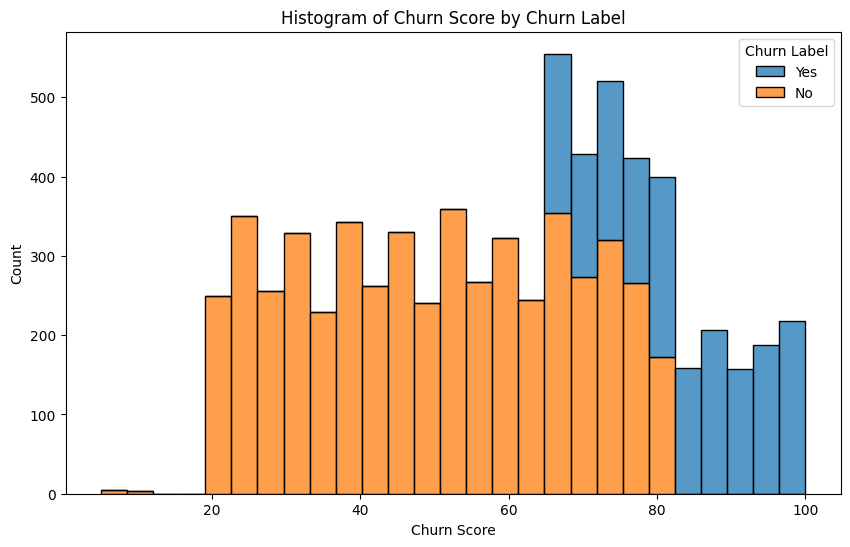

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Churn Score', hue='Churn Label', data=df, multiple="stack")
plt.title('Histogram of Churn Score by Churn Label')
plt.xlabel('Churn Score')
plt.ylabel('Count')
plt.show()

#Yep, that's clean now

In [86]:
# as we aggree above these features have [Yes, No, No "name of service" service], i will consider the last one as "No"
rep_cols = ['Phone Service',
    'Multiple Lines',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    ]
for col in rep_cols:
    df[col] = df[col].apply(lambda x: 'No' if x not in ['Yes', 'No'] else x)

In [87]:
for col in rep_cols:
  print(df[col].value_counts())
  print("-"*50+"\n")

Phone Service
Yes    6361
No      682
Name: count, dtype: int64
--------------------------------------------------

Multiple Lines
No     4072
Yes    2971
Name: count, dtype: int64
--------------------------------------------------

Online Security
No     5024
Yes    2019
Name: count, dtype: int64
--------------------------------------------------

Online Backup
No     4614
Yes    2429
Name: count, dtype: int64
--------------------------------------------------

Device Protection
No     4621
Yes    2422
Name: count, dtype: int64
--------------------------------------------------

Tech Support
No     4999
Yes    2044
Name: count, dtype: int64
--------------------------------------------------

Streaming TV
No     4336
Yes    2707
Name: count, dtype: int64
--------------------------------------------------

Streaming Movies
No     4311
Yes    2732
Name: count, dtype: int64
--------------------------------------------------



In [88]:
#Checing duplicates
df.duplicated().sum()

0

In [89]:
# Checking null valuse
df.isnull().sum()

# We have 11 Null values just in 'Total Charges', we can handel them by filling by the mean of the column.

,0
CustomerID,0
Country,0
State,0
City,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0
Senior Citizen,0
Partner,0


In [90]:
df

,CustomerID,Country,State,City,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,United States,California,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,United States,California,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,United States,California,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,United States,California,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,United States,California,Landers,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,United States,California,Adelanto,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,United States,California,Amboy,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,United States,California,Angelus Oaks,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [91]:
# Fill the null values by calculate the value from simple equation
df["Total Charges"].fillna(df['Monthly Charges'] * df['Tenure Months'], inplace=True)

<ipython-input-91-ae453db85505>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [92]:
# binary data
def myOneHotEncoder(data, col_name):
  data[col_name]= data[col_name].apply(lambda x: 0 if x==data[col_name].unique()[1] else 1)

In [93]:
cols = ['Gender','Senior Citizen','Partner','Dependents','Paperless Billing','Phone Service','Multiple Lines','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']
for col in cols:
  myOneHotEncoder(df, col)

In [94]:
# encode the target
myOneHotEncoder(df, 'Churn Label')

In [95]:
# drop useless categorical features
df.drop(columns=['CustomerID','Country', 'State', 'City', 'Lat Long', 'Churn Reason'], axis=1, inplace=True)

In [96]:
# encode nominal multicalss features
oh_encod = OneHotEncoder(handle_unknown= "ignore",sparse_output=False)
oh_col_train = pd.DataFrame(oh_encod.fit_transform(df[['Internet Service','Contract','Payment Method']]))
df.drop(['Internet Service','Contract','Payment Method'], axis=1, inplace=True)
final_data = pd.concat([df, oh_col_train], axis=1)
final_data.columns = final_data.columns.astype(str)
final_data.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,...,0,1,2,3,4,5,6,7,8,9
0,33.964131,-118.272783,1,1,1,1,2,1,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34.059281,-118.307420,0,1,1,0,2,1,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,34.048013,-118.293953,0,1,1,0,8,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,34.062125,-118.315709,0,1,0,0,28,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,34.039224,-118.266293,1,1,1,0,49,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [97]:
x = final_data.drop(['Churn Label'],axis=1)
y = final_data["Churn Label"]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [99]:

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [100]:
def metricsFormat(y_test, pred):

  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  metrics_table = [
      ["Metric", "Value"],
      ["Precision", "{:.7f}".format(precision)],
      ["Recall", "{:.7f}".format(recall)],
      ["F1 Score", "{:.7f}".format(f1)],
      ["Accuracy", "{:.7f}".format(accuracy)]
  ]
  print(tabulate(metrics_table, headers="firstrow", tablefmt="grid"))

In [101]:
metricsFormat(y_test, pred)

+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Precision | 0.842752 |
+-----------+----------+
| Recall    | 0.8575   |
+-----------+----------+
| F1 Score  | 0.850062 |
+-----------+----------+
| Accuracy  | 0.914123 |
+-----------+----------+


In [102]:
cm = confusion_matrix(y_test, pred)
cm

array([[945,  64],
       [ 57, 343]])

In [103]:
model.score(x_test, y_test)

0.9141234918381831

In [104]:
model.score(x_train, y_train)

0.9334398296059638

In [105]:
# Scores are good somehow, and I believe it could be better by some optimization before jumping into a more complex model

In [106]:
#Let's check the correlation between each feature and the target feature
correlations = final_data.corr()['Churn Label'].sort_values(ascending=False)
print(correlations)


"""
1- It shows that ['Latitude','Longitude','Gender] very close to Zero, which indecats there is no relation

2- As I was thinking about 'Churn Score', there is a direct relation between 'Churn Score' and the target 'Churn Label',
and as we saw in the plots 'Churn Score' is not that accurate so this direct relation and the inaccuracy will negatively affect the model

Even it was accurate, I prefer to assume that 'Churn Score' does not exist in the data because it results from the predictive tool IBM SPSS Modeler. Do all comapnies have SPSS?!
I think of it as an extra luxury that might not be found on all companies.
"""

Churn Value          1.000000
Churn Label          1.000000
Churn Score          0.664897
3                    0.405103
1                    0.308020
8                    0.301919
Dependents           0.248542
Monthly Charges      0.193356
Paperless Billing    0.191825
Tech Support         0.164674
Partner              0.150448
Device Protection    0.066160
Phone Service        0.011942
Longitude            0.004594
Latitude            -0.003384
Gender              -0.008612
Multiple Lines      -0.040102
Streaming Movies    -0.061382
Streaming TV        -0.063228
Online Backup       -0.082255
9                   -0.091683
6                   -0.117937
0                   -0.124214
CLTV                -0.127463
7                   -0.134302
Senior Citizen      -0.150889
Online Security     -0.171226
4                   -0.177820
Total Charges       -0.198324
2                   -0.227890
5                   -0.302253
Tenure Months       -0.352229
Name: Churn Label, dtype: float64


"\n1- It shows that ['Latitude','Longitude','Gender] very close to Zero, which indecats there is no relation\n\n2- As I was thinking about 'Churn Score', there is a direct relation between 'Churn Score' and the target 'Churn Label',\nand as we saw in the plots 'Churn Score' is not that accurate so this direct relation and the inaccuracy will negatively affect the model\n\nEven it was accurate, I prefer to assume that 'Churn Score' does not exist in the data because it results from the predictive tool IBM SPSS Modeler. Do all comapnies have SPSS?!\nI think of it as an extra luxury that might not be found on all companies. \n"

In [107]:
df_exp2 = final_data.drop( ['Latitude','Longitude','Gender'],axis=1)


In [108]:
x_2 = df_exp2.drop(['Churn Label','Churn Score'],axis=1)
y_2 = df["Churn Label"]

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_2,y_2, test_size=0.2, random_state=42)

In [110]:

model_2 = LogisticRegression()
model_2.fit(x_train, y_train)
pred_2 = model_2.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [111]:
metricsFormat(y_test, pred_2)

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Precision |       1 |
+-----------+---------+
| Recall    |       1 |
+-----------+---------+
| F1 Score  |       1 |
+-----------+---------+
| Accuracy  |       1 |
+-----------+---------+


In [112]:
model_2.score(x_test, y_test)

1.0

In [113]:
model_2.score(x_train, y_train)

1.0

In [114]:
# This is awsome, great vlaues, no overfiting .. Now, i can RIP :)

In [115]:
# Let's check the 'Churn Score' effect on the modeling
x_21 = df_exp2.drop('Churn Label',axis=1)
y_21= df["Churn Label"]


x_train, x_test, y_train, y_test = train_test_split(x_21,y_21, test_size=0.2, random_state=42)

model_3 = LogisticRegression()
model_3.fit(x_train, y_train)
pred_3 = model_3.predict(x_test)

metricsFormat(y_test, pred_3)

+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Precision | 0.967089 |
+-----------+----------+
| Recall    | 0.955    |
+-----------+----------+
| F1 Score  | 0.961006 |
+-----------+----------+
| Accuracy  | 0.977999 |
+-----------+----------+


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [116]:
model_3.score(x_test, y_test)

0.9779985805535841

In [117]:
model_3.score(x_train, y_train)

0.9833155839545616

In [118]:
#We conclude from this experiment that "Churn Score" negatively affects the model.